In [292]:
import pandas as pd
from ggplot import *
import seaborn as sns
from Bio import SeqIO
from Bio.Data import CodonTable

In [293]:
%matplotlib inline 

In [294]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.charts import Histogram
output_notebook()

Loading BokehJS ...

In [295]:
def get_sequences_from_file(fasta_fn): #Creates a function named get_sequence_from_file that intakes the fasta file fasta_fn
    sequence_data_dict = {} #makes an empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): #for loop that will call the method parse on SeqIO, requires the input of the field name and field spec  
        description = record.description.split() #makes a variable that will break record.description by the default space delimiter
        species_name = description[1] + " " + description[2] # makes variable that is the description[1] and description[2] seperated by a space
        sequence_data_dict[species_name] = record.seq #sets the sequence_data_dict to a key of the species_name with a value of record.seq
    return(sequence_data_dict) # returns the dictionary 

In [296]:
from Bio.Data import CodonTable
from Bio.Seq import Seq

def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    #mito_table = CodonTable.unambiguous_dna_by_id[2]
    stop_codons= mito_table.stop_codons #variable to save the stop codons for the mito.table
    aa_seq_string="" #creates and empty string
    isStopCodon=None #makes a boolean, default is false
    for i in range(0, len(string_nucleotides),3): #loops through the the string of nucleotides, starting at 0 and increasing by three each time
        codon=string_nucleotides[i]+string_nucleotides[i+1]+string_nucleotides[i+2] #get the nucleotides at position i, i+1, and i+2 to make a codon
        for x in stop_codons: #check of the codon is a stop_codon
            if codon==x:
                isStopCodon=True
                break #end check if codon is equivalent to once of the stop codons
            elif codon!=x:
                isStopCodon=False
                
        if isStopCodon==True:
            break #stop sequence once it reaches a stop codon
        
        elif isStopCodon==False: #if codon is not a stop codon 
            amino_acid=mito_table.forward_table[codon] #convert the codon to an amino acid 
            aa_seq_string=aa_seq_string+amino_acid #add current amino acid to the amino acid sequence
        
    return(aa_seq_string) #returns the amino acid as a string

#print(translate_function("ATGGCCATTGTAATGGGCAGGCGCTGAAAGGGTGCCCGATAG"))




In [297]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
#create the method called better_translation, input is a string of nucleotides
def better_translation(string_nucleotides):
    coding_dna = Seq(string_nucleotides, IUPAC.unambiguous_dna) #make a sequence variable using the input string
    amino_acid_sequence= coding_dna.translate(table="Vertebrate Mitochondrial",to_stop=True) #use the method from biopython package to translate
    return amino_acid_sequence #return the amino acid sequence


#string_nucleotides1="ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG"
#string_nucleotides2="ATGGCCATTGTAATGGGCAGGCGCTGAAAGGGTGCCCGATAG"
#print(better_translation("ATGGCCATTGTAATGGGCAGGCGCTGAAAGGGTGCCCGATAG"))


In [298]:
def get_proportion_aa_type_function(aa_seq): #definition of method get_proportion_aa_type_function
    charged = ['R','K','D','E'] 
    polar = ['Q','N','H','S','T','Y','C','M','W']
    hydrophobic = ['A','I','L','F','V','P','G']
    proportion_charged=0 #set counter of charged aa to 0
    proportion_polar=0 #set counter of polar aa to 0
    proportion_hydro=0 #set counter of hydrophobic aa to 0
    for aa in aa_seq: #loop through all amino acids in the given amino acid sequence
        for charged_aa in charged: #loop through all of the possible charged amino acids
            if aa==charged_aa: #if the current amino acid in the given sequence matches one of the charged amino acids, enter if statement
                proportion_charged=proportion_charged+1 #increase the count of the charged amino amino acids
        for polar_aa in polar: #loop through all of the possible polar amino acids
            if aa==polar_aa:#if the current amino acid in the given sequence matches one of the polar amino acids, enter if statement
                proportion_polar=proportion_polar+1 #increase polar amino acid counter
        for hydrophobic_aa in hydrophobic: #loop through all of the possible hydrophobic amino acids
            if aa==hydrophobic_aa:#if the current amino acid in the given sequence matches one of the hydrophobic amino acids, enter if statement
                proportion_hydro = proportion_hydro + 1 #increase hydrophobic amino acid counter
    #returns the proportion of charged, polar, and hydrophobic amino acids in the amino acid sequence
    return proportion_charged/len(aa_seq), proportion_polar/len(aa_seq), proportion_hydro/len(aa_seq)

#string_nucleotides="ATGGCCATTGTAATGGGCAGGCGCTGAAAGGGTGCCCGATAG"
#aa_seq1=better_translation(string_nucleotides)
#print(better_translation(string_nucleotides))
#print(get_proportion_aa_type_function(aa_seq1))
#print(get_proportion_aa_type_function(aa_seq1)[2])

In [299]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") #applies the get_sequences_from_file function on bears_cytb.fasta
bear_df = pd.read_csv("bears_data.csv") # Includes only data for body mass currently and empty cells for other columns
#species_list = list(bear_df.species) #creates a list of the bear species.
#bear_df
counter=0 #creates a new counter
for key,value in cytb_seqs.items(): #for loop to go through each key (species),value (sequence) set of the cytb_seqs dictionary
    value_string=str(value) #convert the value of the cytb_seqs key to a string
    aa_seq=better_translation(value_string) #takes input DNA sequence as a string and applies the better_translation method
    #sets the bear_df charged,polar, and hydrophobic column of each species using the get_proportion_aa_type_function output 
    bear_df.iloc[counter,2]=get_proportion_aa_type_function(aa_seq)[0] 
    bear_df.iloc[counter,3]=get_proportion_aa_type_function(aa_seq)[1] 
    bear_df.iloc[counter,4]=get_proportion_aa_type_function(aa_seq)[2]
    counter=counter+1 #increase counter by one to move foward to the next row in the next loop
    
print(bear_df)

                  species     mass   charged     polar  hydrophobic
0          Ursus spelaeus  550.800  0.092348  0.329815     0.577836
1            Ursus arctos  203.500  0.092348  0.324538     0.583113
2        Ursus thibetanus   99.714  0.092348  0.327177     0.580475
3        Melursus ursinus  100.030  0.089710  0.340369     0.569921
4        Ursus americanus  110.560  0.089710  0.337731     0.572559
5     Helarctos malayanus   47.020  0.092348  0.340369     0.567282
6  Ailuropoda melanoleuca  118.200  0.089710  0.343008     0.567282
7      Tremarctos ornatus  140.700  0.089710  0.335092     0.575198
8         Ursus maritimus  425.100  0.092348  0.327177     0.580475


In [300]:
#temp=bear_df[['species','mass']]
#temp
#bear_plot = temp.plot(x='species',y='mass', kind='bar',stacked=False,title="Mass of Bear Species", rot=60)
#bear_plot.set_ylabel("Mass")
#bear_plot.set_xlabel("Species")

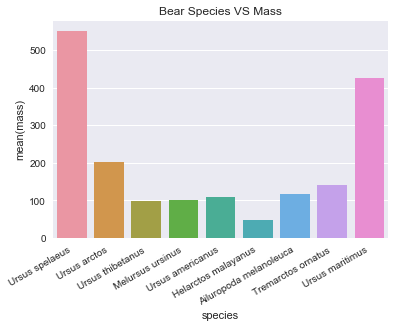

In [301]:
bear_mass_plot=sns.barplot(x='species',y='mass', data=bear_df) #bar plot of bear species vs mass using seaborn
bear_mass_plot.set_xticklabels(labels=bear_df.species,rotation=30,horizontalalignment='right') #sets the xtick specifications
bear_mass_plot.set_title("Bear Species VS Mass") #sets the title of the graph

In [302]:
#The largest species is Ursus spelaeus, also known as a cave bear.
#It live in the Pleistocene, going extinct approximately 24,000 years ago.

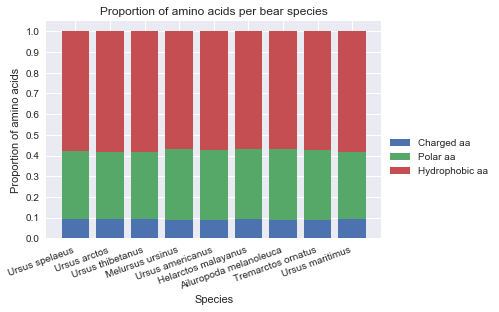

In [303]:
import numpy as np #import numpy
import matplotlib.pyplot as plt #import matplotlib.pyplot
#Makes a stacked bar graph using matplotlib
ind = np.arange(len(bear_df)) #the x locations for the groups
p1 = plt.bar(ind, bear_df.charged) #makes the bottom most bar charged amino acid proportion
p2 = plt.bar(ind, bear_df.polar,bottom=bear_df.charged) #makes the middle bar, polar amino acid proportion
p3 = plt.bar(ind,bear_df.hydrophobic,bottom=bear_df.charged + bear_df.polar) #makes the upper bar, hydrophobic amino acid proportion

plt.ylabel('Proportion of amino acids') #y axis label
plt.xlabel('Species') #x axis label
plt.title('Proportion of amino acids per bear species') #graph title
plt.xticks(ind, (bear_df.species),rotation=20, horizontalalignment='right') #titles, rotates and aligns the x axis ticks, the species
plt.yticks(np.arange(0, 1.1, .10))#makes the ranged of the y axis
plt.legend((p1[0], p2[0], p3[0]), ('Charged aa', 'Polar aa', 'Hydrophobic aa'), bbox_to_anchor=(1.0, 0.5)) #makes the legend and puts it to the side of the graph

plt.show() #displays graph

In [304]:
## What does this show about cytochrome-b for the bears?
#The cytochrome-b gene is most likely highly conserved among bears most likely because the sequence varies 
#very little even though these bears vary quite a bit in mass and at least one of them is extinct. 

In [305]:
bear_df.to_csv('bears_mass_cytb.csv') #creates a csv of the bears_df, named bears_mass_cytb
pd.read_csv('bears_mass_cytb.csv') #verify that the csv is readable

,Unnamed: 0,species,mass,charged,polar,hydrophobic
0,0,Ursus spelaeus,550.800,0.092348,0.329815,0.577836
1,1,Ursus arctos,203.500,0.092348,0.324538,0.583113
2,2,Ursus thibetanus,99.714,0.092348,0.327177,0.580475
3,3,Melursus ursinus,100.030,0.089710,0.340369,0.569921
4,4,Ursus americanus,110.560,0.089710,0.337731,0.572559
5,5,Helarctos malayanus,47.020,0.092348,0.340369,0.567282
6,6,Ailuropoda melanoleuca,118.200,0.089710,0.343008,0.567282
7,7,Tremarctos ornatus,140.700,0.089710,0.335092,0.575198
8,8,Ursus maritimus,425.100,0.092348,0.327177,0.580475
